In [ ]:
 from google.colab import files
data=files.upload()

Saving Book_ipl22_ver_33.csv to Book_ipl22_ver_33.csv


In [ ]:
ls

Book_ipl22_ver_33.csv  sample_data/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Book_ipl22_ver_33.csv')
df.set_index('match_id',inplace=True)
df

,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
match_id,,,,,,,,,,,,,,,,,,,
1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43


**1 ) which team is winner of ipl 22**

In [ ]:
df[df['stage']=='Final']['match_winner']

match_id
74    Gujarat
Name: match_winner, dtype: object

**2 ) in ipl22 how many teams choose bat first after toss win**

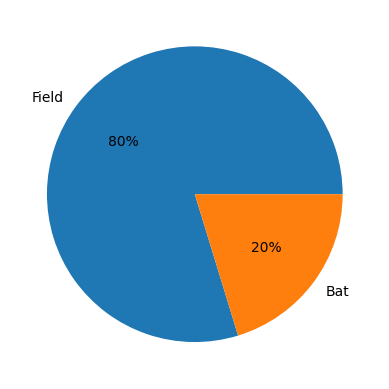

In [ ]:
a=df['toss_decision'].value_counts()
plt.pie(x=a.values,labels=a.index,autopct='%.0f%%')
plt.show()

**3 )how many teams won the game after winning toss**

Field    29
Bat       7
Name: toss_decision, dtype: int64

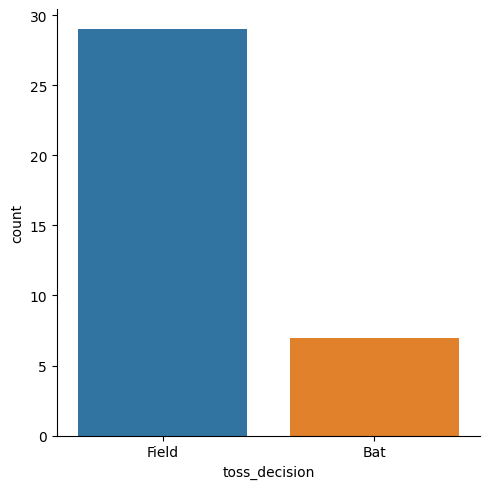

In [ ]:
b=df[ (df['toss_winner']==df['match_winner'])]
c=sns.catplot(x='toss_decision',data=b,kind='count')
b['toss_decision'].value_counts()


**4 ) table topper ranking in group stage matches**

Text(0.5, 1.0, 'Number of Wins by Team in the "Group" Stage')

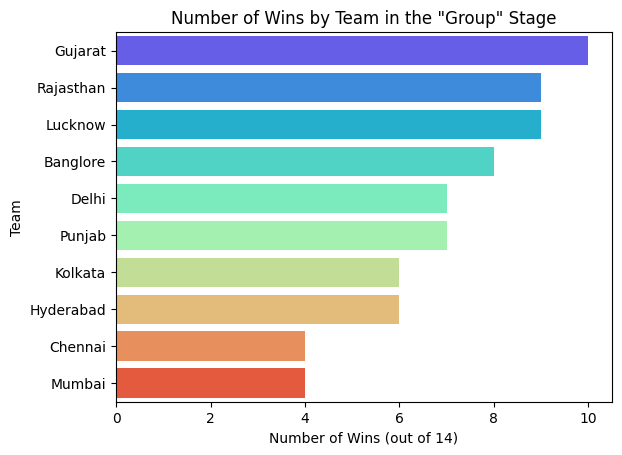

In [ ]:
gr_stage_matches=df[df['stage']=='Group']
d=gr_stage_matches['match_winner'].value_counts()
sns.barplot(x=d.values, y=d.index, palette='rainbow')

plt.xlabel('Number of Wins (out of 14)')
plt.ylabel('Team')
plt.title('Number of Wins by Team in the "Group" Stage')

**5 ) In Data there is no column define , Team1 what is doing first Bat or field , its same for Team2 , add a colum team1_first & team2_first which have values Bat or Field**

In [ ]:
# The np.where function is used to apply a condition to elements in an array or Series and return different values based on that condition.
# np.where takes three arguments:

# The condition to be evaluated (in this case, whether the team is batting first or second based on toss decision and winner).
# The value to be assigned if the condition is True.
# The value to be assigned if the condition is False.

# Create a new column 'batting_first_team1' with team names
df['batting_first_team'] = np.where(
    ((df['team1'] == df['toss_winner']) & (df['toss_decision'] == 'Bat')) |
    ((df['team1'] != df['toss_winner']) & (df['toss_decision'] == 'Field')),
    df['team1'],
    df['team2']
)

# Create a new column 'batting_second_team1' with team names
df['batting_second_team'] = np.where(
    ((df['team1'] == df['toss_winner']) & (df['toss_decision'] == 'Field')) |
    ((df['team1'] != df['toss_winner']) & (df['toss_decision'] == 'Bat')),
    df['team1'],
    df['team2']
)
df.iloc[:,[0,1,2,3,5,6,19,20]]


,date,venue,team1,team2,toss_winner,toss_decision,batting_first_team,batting_second_team
match_id,,,,,,,,
1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Kolkata,Field,Chennai,Kolkata
2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Delhi,Field,Mumbai,Delhi
3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Punjab,Field,Banglore,Punjab
4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Gujarat,Field,Lucknow,Gujarat
5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Hyderabad,Field,Rajasthan,Hyderabad
...,...,...,...,...,...,...,...,...
70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Hyderabad,Bat,Hyderabad,Punjab
71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Gujarat,Field,Rajasthan,Gujarat
72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Lucknow,Field,Banglore,Lucknow


**6 ) in first inning each teams highest score**

In [ ]:
groups=df.groupby(by='batting_first_team')
max_1st_inning=groups['first_ings_score'].max()
max_1st_inning

batting_first_team
Banglore     207
Chennai      216
Delhi        215
Gujarat      192
Hyderabad    195
Kolkata      177
Lucknow      210
Mumbai       177
Punjab       209
Rajasthan    222
Name: first_ings_score, dtype: int64

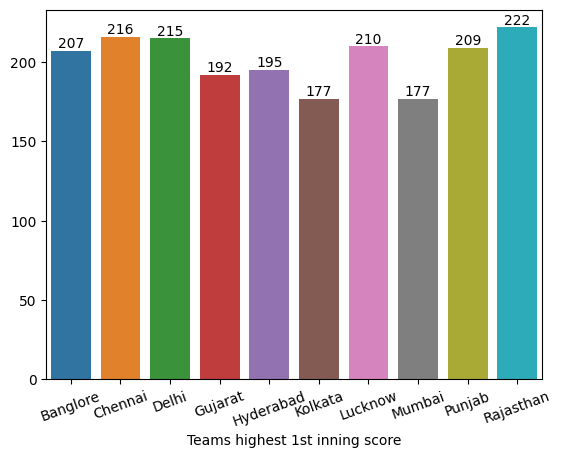

In [ ]:
bars=sns.barplot(x=max_1st_inning.index,y=max_1st_inning.values)
for i in bars.containers:
    bars.bar_label(i,)
plt.xticks(rotation = 20)
plt.xlabel('Teams highest 1st inning score')
plt.show()

**7 ) Highest score of Players in Batting**

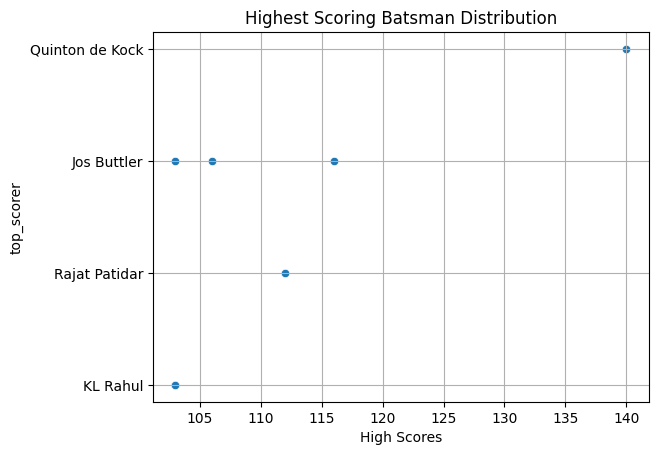

In [ ]:
high_score_data=df.sort_values(by='highscore',ascending=False).head(7)

batsman_names = high_score_data['top_scorer']
high_scores = high_score_data['highscore']

sns.scatterplot(x=high_scores, y=batsman_names)

# Customize the plot
plt.xlabel("High Scores")
plt.title("Highest Scoring Batsman Distribution")

# Show the plot
plt.grid(True)
plt.show()

**8 ) Best bowling of players**

<Axes: xlabel='best_bowling', ylabel='best_bowling_figure'>

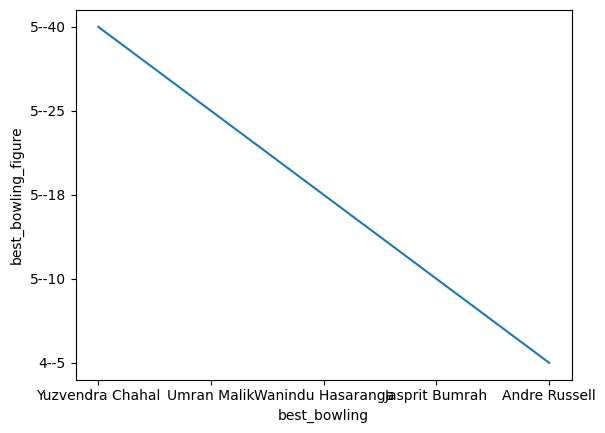

In [ ]:
best_bowl=df.sort_values(by='best_bowling_figure',ascending=False).head()
best_bowl
sns.lineplot(x=best_bowl['best_bowling'],y=best_bowl['best_bowling_figure'])

**9 ) Most of times player_of_the_match winner players**

In [ ]:
a=df['player_of_the_match'].value_counts().head(5)
a

Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Name: player_of_the_match, dtype: int64

**10 ) Which satdium have conducted most matches of ipl22**

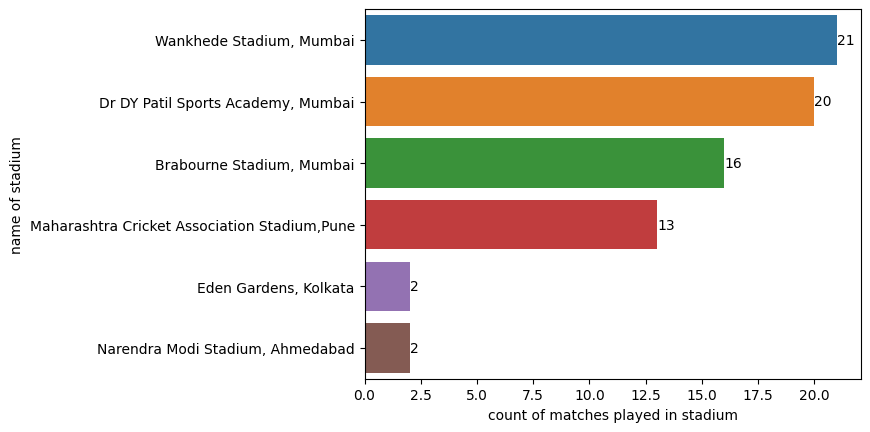

In [ ]:
a=df['venue'].value_counts()
bars=sns.barplot(x=a.values, y=a.index)
plt.xlabel('count of matches played in stadium')
plt.ylabel('name of stadium')

for i in bars.containers:
  bars.bar_label(i,)

**11 ) highest and lowest scores in each stadium**

In [ ]:
df['highest_score'] = df[['first_ings_score', 'second_ings_score']].max(axis=1)
df['lowest_score'] = df[['first_ings_score', 'second_ings_score']].min(axis=1)
df.loc[:,['venue','highest_score','lowest_score']]

,venue,highest_score,lowest_score
match_id,,,
1,"Wankhede Stadium, Mumbai",133,131
2,"Brabourne Stadium, Mumbai",179,177
3,"Dr DY Patil Sports Academy, Mumbai",208,205
4,"Wankhede Stadium, Mumbai",161,158
5,"Maharashtra Cricket Association Stadium,Pune",210,149
...,...,...,...
70,"Wankhede Stadium, Mumbai",160,157
71,"Eden Gardens, Kolkata",191,188
72,"Eden Gardens, Kolkata",207,193


In [ ]:
# Group the data by 'venue' and find the highest and lowest scores by team1 or team2
venue_scores = df.groupby('venue').agg({'highest_score': 'max', 'lowest_score': 'min'})
venue_scores
# venue_scores.plot(kind='bar')

,highest_score,lowest_score
venue,,
"Brabourne Stadium, Mumbai",217,68
"Dr DY Patil Sports Academy, Mumbai",216,113
"Eden Gardens, Kolkata",207,188
"Maharashtra Cricket Association Stadium,Pune",210,82
"Narendra Modi Stadium, Ahmedabad",161,130
"Wankhede Stadium, Mumbai",222,97


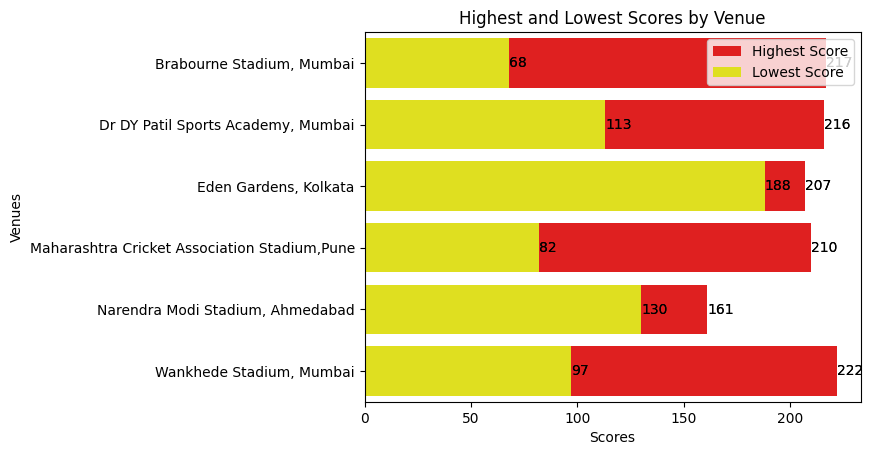

In [ ]:
# bar plot for highest scores
a=sns.barplot(y=venue_scores.index, x='highest_score', data=venue_scores, color='red', label='Highest Score')
# bar plot for lowest scores next to it
b=sns.barplot(y=venue_scores.index, x='lowest_score', data=venue_scores, color='yellow', label='Lowest Score')

#to show a bar values
for i in a.containers:
    a.bar_label(i,)
for j in b.containers:
    b.bar_label(j,)

plt.ylabel("Venues")
plt.xlabel("Scores")
plt.title("Highest and Lowest Scores by Venue")
plt.legend()

plt.show()

**12 ) first inning distribution venue wise**

<Axes: xlabel='first_ings_score', ylabel='venue'>

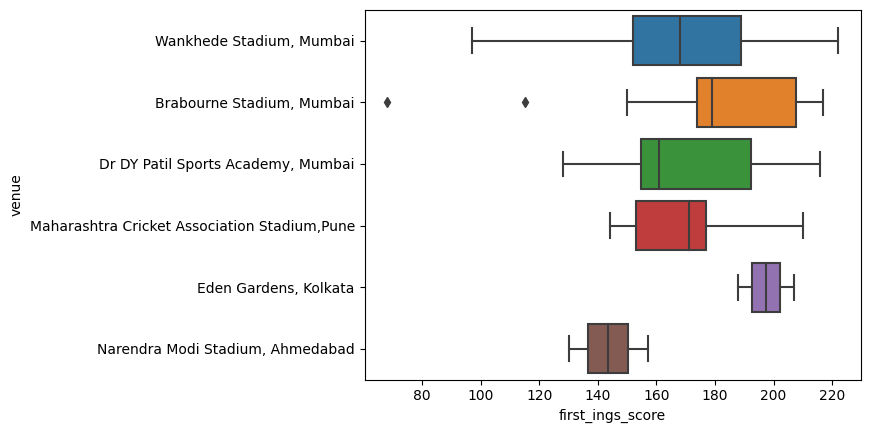

In [ ]:
sns.boxplot(y='venue',x='first_ings_score',data=df)

**13 ) Distribution of first inning and second inning score**

<Axes: xlabel='first_ings_score', ylabel='second_ings_score'>

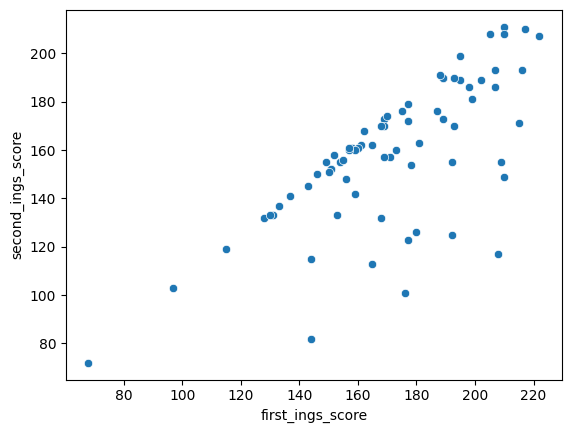

In [ ]:
sns.scatterplot(x='first_ings_score',y='second_ings_score',data=df)

**14 ) each teams average score while batting**

In [ ]:
# each teams average score in first inning of batting
first=df.groupby('batting_first_team')['first_ings_score'].mean().round()
first

batting_first_team
Banglore     171.0
Chennai      167.0
Delhi        178.0
Gujarat      162.0
Hyderabad    182.0
Kolkata      158.0
Lucknow      178.0
Mumbai       164.0
Punjab       173.0
Rajasthan    176.0
Name: first_ings_score, dtype: float64

In [ ]:
# each teams average score in second inning of batting
second=df.groupby('batting_second_team')['second_ings_score'].mean().round()
second

batting_second_team
Banglore     156.0
Chennai      154.0
Delhi        161.0
Gujarat      170.0
Hyderabad    150.0
Kolkata      159.0
Lucknow      160.0
Mumbai       155.0
Punjab       158.0
Rajasthan    164.0
Name: second_ings_score, dtype: float64

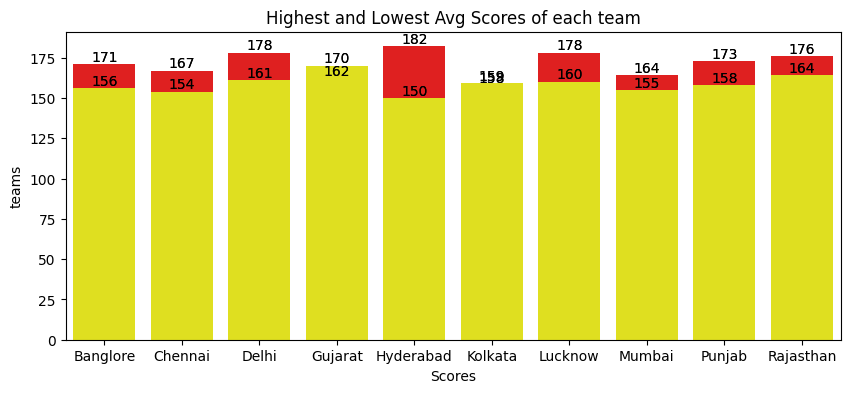

In [ ]:
plt.figure(figsize=(10, 4))
# bar plot for highest scores
a=sns.barplot(x=first.index, y=first.values, color='red')
b=sns.barplot(x=second.index, y=second.values ,color='yellow')

#to show a bar values
for i in a.containers:
    a.bar_label(i,)
for j in b.containers:
    b.bar_label(j)

plt.title("Highest and Lowest Avg Scores of each team")
plt.xlabel("Scores")
plt.ylabel("teams")
plt.show()